# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [20]:
#Em primeiro lugar, iremos carregar as bases de dados
X_tr = pd.read_csv('./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/bases_tratadas/X_train.csv',index_col= 'Unnamed: 0')
X_test = pd.read_csv("./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/bases_tratadas/X_test.csv",index_col= 'Unnamed: 0')
y_tr = pd.read_csv("./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/bases_tratadas/y_train.csv",index_col= 'Unnamed: 0')
y_test = pd.read_csv("./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/bases_tratadas/y_test.csv",index_col= 'Unnamed: 0')

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [72]:
#Dividindo a base de treino entre treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size= .25, random_state=0)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [73]:
arvore = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

# A linha abaixo usa o atributo clf.feature_importances_ para calcular a importância de cada variável
importancias_features = arvore.feature_importances_

# Agora iremos ordenar as importâncias
indices_features_ordenadas = np.argsort(importancias_features)[::-1]

# Exibir as features ordenadas por importância
print("Features ordenadas por importância:")
for i, indice in enumerate(indices_features_ordenadas):
    print(f"Feature {indice} - Importância: {importancias_features[indice]}")

Features ordenadas por importância:
Feature 53 - Importância: 0.23611458953983905
Feature 272 - Importância: 0.20117063442564823
Feature 560 - Importância: 0.12997243293757352
Feature 202 - Importância: 0.10989451206021136
Feature 75 - Importância: 0.09848679338514021
Feature 58 - Importância: 0.02723943428643471
Feature 223 - Importância: 0.021546681756706865
Feature 160 - Importância: 0.016479897780743574
Feature 449 - Importância: 0.013511310280346292
Feature 0 - Importância: 0.008558251726732505
Feature 452 - Importância: 0.0065772930400132
Feature 38 - Importância: 0.005822617329567867
Feature 446 - Importância: 0.0051957443703690405
Feature 54 - Importância: 0.0047079602023104685
Feature 41 - Importância: 0.004344262361586901
Feature 42 - Importância: 0.003913112421339052
Feature 55 - Importância: 0.003370288479279054
Feature 72 - Importância: 0.0033390288539792887
Feature 504 - Importância: 0.0030753312718400194
Feature 51 - Importância: 0.003004337112636576
Feature 410 - Import

Como vimos, as variáveis mais importantes são as de índice 53, 272 e 560, que correspondem às colunas 'tGravityAcc-max()-Z', 'fBodyAcc-mad()-X' e 'angle(Y,gravityMean)', respectivamente. Essas, portanto, serão as variáveis que iremos usar a seguir.

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [74]:
#Primeiramente iremos filtrar as bases de teste e treinamento
X_train_filtrada = X_train[['tGravityAcc-max()-Z','fBodyAcc-mad()-X', 'angle(Y,gravityMean)']].copy()
X_valid_filtrada = X_valid[['tGravityAcc-max()-Z','fBodyAcc-mad()-X', 'angle(Y,gravityMean)']].copy()
X_test_filtrada = X_test[['tGravityAcc-max()-Z','fBodyAcc-mad()-X', 'angle(Y,gravityMean)']].copy()

In [75]:
%%time
caminho = DecisionTreeClassifier(random_state = 0).cost_complexity_pruning_path(X_train_filtrada, y_train)
alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 31.2 ms
Wall time: 37.9 ms


In [76]:
%%time
clfs = []
for alpha in alphas:
    clf = DecisionTreeClassifier(ccp_alpha = alpha, min_samples_leaf = 20).fit(X_train_filtrada, y_train)
    clfs.append(clf)
    
clfs = list(set(clfs))

CPU times: total: 2.23 s
Wall time: 5.81 s


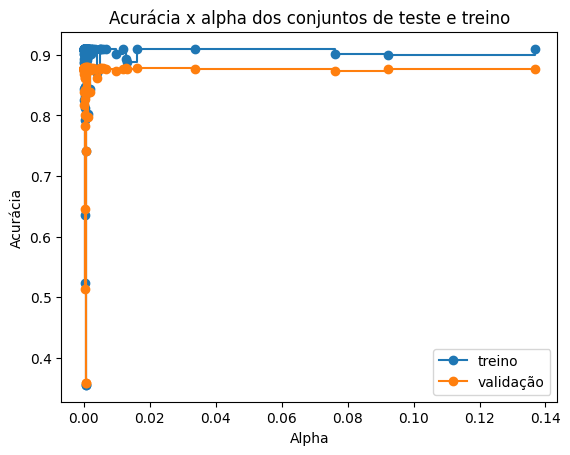

CPU times: total: 484 ms
Wall time: 1.07 s


In [77]:
%%time
train_scores = [clf.score(X_train_filtrada, y_train)for clf in clfs]
valid_scores = [clf.score(X_valid_filtrada, y_valid)for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alpha dos conjuntos de teste e treino')
ax.plot(alphas[:-1], train_scores[:-1], marker = 'o', label = 'treino', drawstyle = 'steps-post')
ax.plot(alphas[:-1], valid_scores[:-1], marker = 'o', label = 'validação', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [78]:
melhor_ind = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) -1
melhor_arvore = clfs[melhor_ind]

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [79]:
y_pred = melhor_arvore.predict(X_test_filtrada)
accuracy_score(y_pred, y_test)

0.6959619952494062

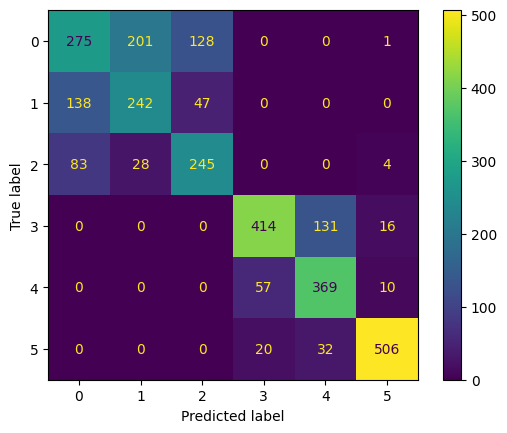

In [80]:
cm = confusion_matrix(y_pred, y_test)
cm_plot = cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()